_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [1]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title"><b>Weather Condition Classification</b></div>

<div class="usecase-authors"><b>Authored by: </b>Aremu Akintomiwa James</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Data analysis, Machine Learning, Basic Meteorology</div>
</div>

<div class="usecase-section-header"><b>Scenario</b></div>

 As an urban planner or agricultural manager, I need to accurately classify different weather conditions using environmental features to determine the optimal times for infrastructure projects and agricultural activities. This will ensure that operations are conducted under favorable weather conditions, thereby providing actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>What this use case will teach you</b></div>

At the end of this use case you will:
- Understand how to preprocess and analyze environmental data.
- Learn how to build and evaluate a machine learning model for classification tasks.
- Gain experience in feature selection and engineering for weather-related datasets.
- Develop skills in using Python libraries such as Pandas, Scikit-learn, and Matplotlib.
- Understand the importance of accurate weather classification for planning and decision-making in various sectors.


<div class="usecase-section-header"><b> introduction</b></div>

In this use case, we aim to develop a robust machine learning model capable of accurately classifying various weather conditions such as sunny, cloudy, rainy, and stormy using environmental features. These features include ambient air temperature, relative humidity, atmospheric pressure, wind speed and direction, and gust wind speed. Accurate weather classification is important for optimizing the timing of infrastructure projects and agricultural activities, ensuring that operations are conducted under favorable weather conditions. By leveraging machine learning techniques, we can provide actionable insights for planning and decision-making.



<div class="usecase-section-header"><b>Background</b></div>

Weather conditions have a significant impact on various sectors, including agriculture, construction, and transportation. Accurate weather forecasts and classifications can help in planning and executing operations more efficiently. For instance, farmers can optimize planting and harvesting times based on expected weather conditions, while construction projects can be scheduled to avoid adverse weather that could delay progress or compromise safety.

In this project, we will use historical weather data from Melbourne's open data portal. The datasets include:
- Microclimate sensors data — CoM Open Data Portal (melbourne.vic.gov.au)
- Argyle Square Weather Stations (Historical Data) — CoM Open Data Portal (melbourne.vic.gov.au)

- Argyle Square Air Quality — CoM Open Data Portal (melbourne.vic.gov.au)


<div class="usecase-section-header"><b>Dataset Information</b></div>

The dataset for this project includes the following features::
- Ambient air temperature (°C)
- Relative humidity (%)
- Atmospheric pressure (hPa)
- Wind speed (m/s)
- Wind direction (degrees)
- Gust wind speed (m/s)


These features will be used to classify weather conditions into categories such as sunny, cloudy, rainy, and stormy. The dataset will be preprocessed to handle any missing values, outliers, or inconsistencies before being used to train the machine learning model.

In [2]:
#dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# **Preferred Method**: Export Endpoint
import requests
from io import StringIO


def API_unlimited(datasetName):

    dataset_id = datasetName
    # https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
    #dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'
    
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'
    
    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC',
       # 'api_key': apikey
    }
    
    # GET request
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetName = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetName.sample(10, random_state=999)) # Test
        return datasetName
    else:
        print(f'Request failed with status code {response.status_code}')

In [4]:
dataset_id_1 = 'microclimate-sensors-data'
dataset_id_2 = 'meshed-sensor-type-1'
dataset_id_3 = 'argyle-square-air-quality'

dataset1 = API_unlimited(dataset_id_1)

                device_id                received_at  \
32534  ICTMicroclimate-01  2024-06-15T23:26:58+00:00   
32835  ICTMicroclimate-09  2024-06-18T01:44:07+00:00   
45149  ICTMicroclimate-07  2024-07-23T18:56:10+00:00   
18635  ICTMicroclimate-07  2024-07-01T11:14:55+00:00   
2046   ICTMicroclimate-02  2024-06-09T11:10:50+00:00   
34454  ICTMicroclimate-09  2024-07-05T09:54:27+00:00   
48993  ICTMicroclimate-03  2024-07-30T23:18:50+00:00   
39480           aws5-0999  2024-07-12T13:17:38+00:00   
45912  ICTMicroclimate-03  2024-07-26T22:20:56+00:00   
1361   ICTMicroclimate-08  2024-07-09T09:14:10+00:00   

                                          sensorlocation  \
32534                    Birrarung Marr Park - Pole 1131   
32835  SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...   
45149  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
18635  Tram Stop 7C - Melbourne Tennis Centre Precinc...   
2046                          101 Collins St L11 Rooftop   
34454  SkyFarm (Jeff's 

In [5]:
dataset2 = API_unlimited(dataset_id_2)

              dev_id                       time         rtc  battery  \
109957  atmos41-32fc  2024-04-05T00:03:34+00:00  78265685.0    4.210   
99960   atmos41-32fc  2023-12-31T02:00:19+00:00  69978305.0    4.209   
84801   atmos41-32fc  2023-06-07T16:01:34+00:00  52144056.0    4.136   
114206  atmos41-32fc  2024-06-08T04:35:42+00:00  83811588.0    4.208   
23909   atmos41-32fc  2021-11-10T12:52:33+00:00   2539304.0    4.156   
52793   atmos41-32fc  2022-03-25T06:00:10+00:00  14178534.0    4.209   
56002   atmos41-32fc  2022-03-28T20:34:50+00:00  14490213.0    4.146   
12449   atmos41-32fc  2021-09-23T00:27:54+00:00  21430959.0    4.222   
71928   atmos41-32fc  2023-01-24T11:29:18+00:00  40550158.0    4.171   
71311   atmos41-32fc  2022-12-22T13:23:26+00:00  37705811.0    4.169   

        solarpanel  command  solar  precipitation  strikes  windspeed  \
109957      21.822      0.0  388.0            0.0      0.0       1.03   
99960       21.838      0.0  109.0            0.0      0.0   

In [6]:
dataset3 = API_unlimited(dataset_id_3)

                             time    dev_id           sensor_name  \
33731   2020-06-11T16:21:52+00:00  ems-ce10  Air Quality Sensor 1   
58139   2021-07-10T10:57:51+00:00  ems-ce10  Air Quality Sensor 1   
107044  2022-06-09T20:34:51+00:00  ems-ec8a  Air Quality Sensor 2   
86091   2020-11-29T11:46:53+00:00  ems-ec8a  Air Quality Sensor 2   
142270  2024-06-23T01:38:09+00:00  ems-ec8a  Air Quality Sensor 2   
1659    2021-05-20T03:25:01+00:00  ems-ce10  Air Quality Sensor 1   
137971  2024-04-05T18:50:31+00:00  ems-ec8a  Air Quality Sensor 2   
2464    2020-07-12T19:39:43+00:00  ems-ec8a  Air Quality Sensor 2   
124252  2023-02-10T03:12:05+00:00  ems-ec8a  Air Quality Sensor 2   
117136  2022-11-03T14:55:29+00:00  ems-ec8a  Air Quality Sensor 2   

                       lat_long  averagespl  carbonmonoxide  humidity  ibatt  \
33731   -37.802772, 144.9655513        55.0         -2037.0      89.0  163.0   
58139   -37.802772, 144.9655513        62.0         -3058.0     100.0  138.0   


In [7]:
dataset1.head()

,device_id,received_at,sensorlocation,latlong,minimumwinddirection,averagewinddirection,maximumwinddirection,minimumwindspeed,averagewindspeed,gustwindspeed,airtemperature,relativehumidity,atmosphericpressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


In [8]:
dataset1.shape

(51544, 16)

In [9]:
dataset1.columns

Index(['device_id', 'received_at', 'sensorlocation', 'latlong',
       'minimumwinddirection', 'averagewinddirection', 'maximumwinddirection',
       'minimumwindspeed', 'averagewindspeed', 'gustwindspeed',
       'airtemperature', 'relativehumidity', 'atmosphericpressure', 'pm25',
       'pm10', 'noise'],
      dtype='object')

In [10]:
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,windspeed,winddirection,gustspeed,vapourpressure,atmosphericpressure,relativehumidity,airtemp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


In [11]:
dataset2.shape

(119859, 18)

In [12]:
dataset2.columns

Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'windspeed', 'winddirection', 'gustspeed',
       'vapourpressure', 'atmosphericpressure', 'relativehumidity', 'airtemp',
       'lat_long', 'sensor_name'],
      dtype='object')

In [13]:
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [14]:
dataset3.shape

(142507, 19)

In [15]:
dataset3.columns

Index(['time', 'dev_id', 'sensor_name', 'lat_long', 'averagespl',
       'carbonmonoxide', 'humidity', 'ibatt', 'nitrogendioxide', 'ozone',
       'particulateserr', 'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25',
       'temperature', 'vbatt', 'vpanel'],
      dtype='object')

#### standardizing column names for dataset1

In [16]:
dataset1 = dataset1.rename(columns={'received_at':'time', 'latlong':'lat_long', 'minimumwinddirection':'min_wind_direction', 'averagewinddirection':'avg_wind_direction', 'maximumwinddirection':'max_wind_direction', 
                        'minimumwindspeed':'min_wind_speed', 'averagewindspeed':'avg_wind_speed', 'gustwindspeed':'gust_wind_speed',
          'airtemperature':'air_temp', 'relativehumidity':'humidity', 'atmosphericpressure':'atm_pressure'})
dataset1.head()

,device_id,time,sensorlocation,lat_long,min_wind_direction,avg_wind_direction,max_wind_direction,min_wind_speed,avg_wind_speed,gust_wind_speed,air_temp,humidity,atm_pressure,pm25,pm10,noise
0,ICTMicroclimate-09,2024-07-17T15:33:32+00:00,SkyFarm (Jeff's Shed). Rooftop - Melbourne Con...,"-37.8223306, 144.9521696",0.0,300.0,359.0,0.0,0.9,3.5,8.7,86.3,1013.1,1.0,4.0,63.1
1,ICTMicroclimate-03,2024-07-17T15:06:13+00:00,CH1 rooftop,"-37.8140348, 144.96728",0.0,308.0,349.0,0.0,0.4,1.0,8.5,99.0,1008.7,3.0,5.0,69.7
2,ICTMicroclimate-07,2024-07-17T15:21:33+00:00,Tram Stop 7C - Melbourne Tennis Centre Precinc...,"-37.8222341, 144.9829409",0.0,262.0,354.0,0.0,0.4,1.6,9.0,85.0,1016.1,0.0,0.0,55.3
3,ICTMicroclimate-08,2024-07-17T15:40:34+00:00,Swanston St - Tram Stop 13 adjacent Federation...,"-37.8184515, 144.9678474",0.0,339.0,359.0,0.0,0.9,4.3,9.0,83.9,1014.1,1.0,1.0,60.6
4,ICTMicroclimate-02,2024-07-17T15:42:47+00:00,101 Collins St L11 Rooftop,"-37.814604, 144.9702991",7.0,118.0,261.0,1.4,2.1,4.1,9.0,96.7,1009.4,8.0,11.0,69.0


#### atandersizing column names for datasets2

In [17]:
dataset2 =dataset2.rename(columns={'windspeed':'avg_wind_speed', 'winddirection':'avg_wind_direction', 'gustspeed':'gust_wind_speed',
           'atmosphericpressure':'atm_pressure', 'relativehumidity':'humidity', 'airtemp':'air_temp'})
dataset2.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,humidity,air_temp,lat_long,sensor_name
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,253.5,10.74,0.93,100.70,88.0,7.8,"-37.8022141, 144.9656262",Weather Station
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,158.5,1.14,1.25,100.91,68.0,16.2,"-37.8022141, 144.9656262",Weather Station
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,7.7,2.43,1.21,100.83,75.0,14.0,"-37.8022141, 144.9656262",Weather Station
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,9.9,3.22,1.17,100.91,76.0,13.4,"-37.8022141, 144.9656262",Weather Station
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,253.8,8.07,0.78,101.63,56.0,11.7,"-37.8022141, 144.9656262",Weather Station


#### standersizing column names for datasets3

In [18]:
dataset3.rename(columns={'temperature':'air_temp',})
dataset3.head()

,time,dev_id,sensor_name,lat_long,averagespl,carbonmonoxide,humidity,ibatt,nitrogendioxide,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2020-06-09T09:02:38+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6448.0,65.0,71.0,287.0,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2020-06-09T11:17:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,68.0,89.0,325.0,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:46:34+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",58.0,-6261.0,77.0,169.0,268.0,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2020-06-09T11:32:37+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",55.0,-6916.0,69.0,76.0,325.0,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T06:04:33+00:00,ems-ec8a,Air Quality Sensor 2,"-37.802772, 144.9655513",56.0,-6261.0,51.0,12.0,258.0,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [19]:
dataset3.shape

(142507, 19)

#### merging the datasets together

In [20]:
# Convert time column in df1 to datetime with UTC timezone
#dataset2['time'] = pd.to_datetime(dataset2['time'], utc=True)

In [21]:
combine_df = pd.concat([dataset2, dataset3], axis=1,join='inner')
combine_df.head()

,dev_id,time,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,atmos41-32fc,2021-05-14T18:11:23+00:00,10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,atmos41-32fc,2022-05-03T10:25:31+00:00,17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,atmos41-32fc,2022-05-03T21:42:23+00:00,17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,atmos41-32fc,2022-05-04T00:42:43+00:00,17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,atmos41-32fc,2021-05-15T07:55:22+00:00,10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [22]:
missing_percent =combine_df.isna().sum()*100/len(combine_df)
missing_percent

dev_id                0.000000
time                  0.000000
rtc                   2.233458
battery               1.742047
solarpanel            1.832153
command               1.776254
solar                 2.321895
precipitation         2.322729
strikes               2.322729
avg_wind_speed        1.834656
avg_wind_direction    1.835490
gust_wind_speed       1.835490
vapourpressure        2.322729
atm_pressure          1.835490
humidity              1.835490
air_temp              2.321895
lat_long              2.233458
sensor_name           2.233458
time                  0.000000
dev_id                0.000000
sensor_name           0.000000
lat_long              0.000000
averagespl            7.366990
carbonmonoxide        7.366990
humidity              7.366990
ibatt                 7.366990
nitrogendioxide       7.366990
ozone                 7.366990
particulateserr       7.366990
particulatesvsn       7.366990
peakspl               7.366990
pm1                   7.366990
pm10    

In [23]:
combine_df.columns


Index(['dev_id', 'time', 'rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long', 'sensor_name', 'time', 'dev_id', 'sensor_name',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel'],
      dtype='object')

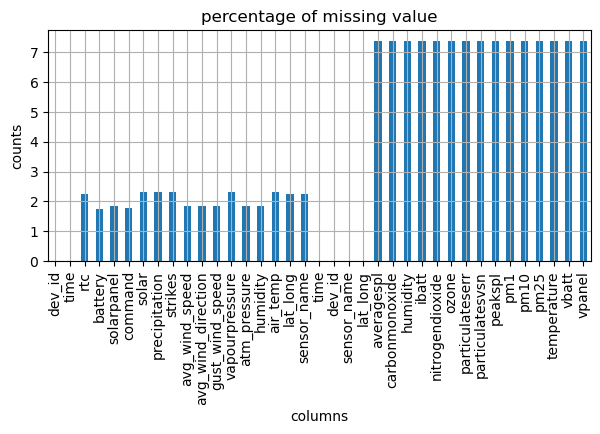

In [24]:
plt.figure(figsize=(7,3))
new_par = missing_percent[missing_percent <= 10].plot.bar()
plt.gca().set_xlabel("columns")
plt.gca().set_ylabel("counts")
plt.gca().set_title("percentage of missing value")
plt.grid()
plt.show()

In [25]:
##column to work with
selected_columns =['time', 'lat_long','rtc', 'battery', 'solarpanel', 'command', 'solar',
       'precipitation', 'strikes', 'avg_wind_speed', 'avg_wind_direction',
       'gust_wind_speed', 'vapourpressure', 'atm_pressure', 'humidity',
       'air_temp', 'lat_long',   'averagespl', 'carbonmonoxide', 'humidity', 'ibatt',
       'nitrogendioxide', 'ozone', 'particulateserr', 'particulatesvsn',
       'peakspl', 'pm1', 'pm10', 'pm25', 'temperature', 'vbatt', 'vpanel']


new_df = combine_df[selected_columns]
new_df.head()

,time,time,lat_long,lat_long,rtc,battery,solarpanel,command,solar,precipitation,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,2020-06-09T09:02:38+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10090042.0,4.161,0.024,0.0,0.0,0.0,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,2020-06-09T11:17:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17564045.0,4.181,0.000,0.0,0.0,0.0,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,2022-05-03T21:46:34+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17604657.0,4.143,20.670,0.0,24.0,0.0,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,2020-06-09T11:32:37+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",17615477.0,4.208,20.694,0.0,68.0,0.0,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,2021-05-15T06:04:33+00:00,"-37.8022141, 144.9656262","-37.802772, 144.9655513",10139481.0,4.197,0.128,0.0,0.0,0.0,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [26]:
new_df.columns = ['time_1', 'time_2', 'lat_long_1', 'lat_long_2', 'rtc', 'battery', 'solarpanel',
       'command', 'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'humidity', 'humidity', 'air_temp', 'lat_long',
       'lat_long', 'averagespl', 'carbonmonoxide', 'humidity_1', 'humidity_2',
       'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel']

In [27]:
cleaned_df = new_df.drop(columns=['time_2','lat_long', 'lat_long_2','humidity','humidity_2'])

In [28]:
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


#### checking the distribution of some features

Text(0.5, 1.0, 'air_temp')

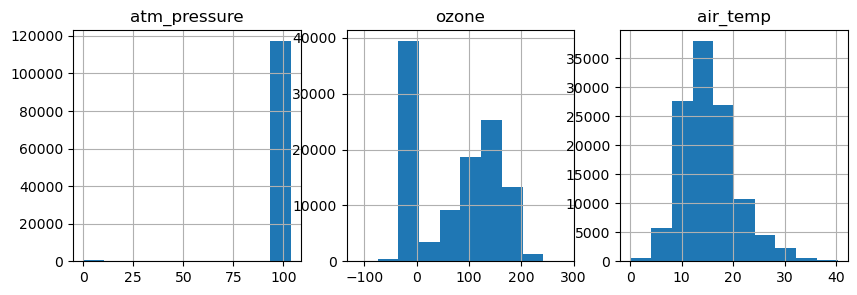

In [29]:

#trying to check the distribution of 
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
cleaned_df['atm_pressure'].hist()
plt.title('atm_pressure')

plt.subplot(1,3,2)
cleaned_df['ozone'].hist()
plt.title('ozone')

plt.subplot(1,3,3)
cleaned_df['air_temp'].hist()
plt.title('air_temp')

In [30]:
#####fillin up the nan with the their median
for column in cleaned_df:
    if pd.api.types.is_numeric_dtype(cleaned_df[column]):
        cleaned_df[column].fillna(cleaned_df[column].median(), inplace=True)

# Display the DataFrame after filling NA with median
cleaned_df.head()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
0,2021-05-14T18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,4.09,...,137.0,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00
1,2022-05-03T10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,156.0,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00
2,2022-05-03T21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,137.0,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33
3,2022-05-04T00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,156.0,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00
4,2021-05-15T07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,119.0,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33


In [31]:
cleaned_df.columns

Index(['time_1', 'lat_long_1', 'rtc', 'battery', 'solarpanel', 'command',
       'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'air_temp', 'averagespl', 'carbonmonoxide',
       'humidity_1', 'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel'],
      dtype='object')

In [32]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.000000
lat_long_1            2.233458
rtc                   0.000000
battery               0.000000
solarpanel            0.000000
command               0.000000
solar                 0.000000
precipitation         0.000000
strikes               0.000000
avg_wind_speed        0.000000
avg_wind_direction    0.000000
gust_wind_speed       0.000000
vapourpressure        0.000000
atm_pressure          0.000000
air_temp              0.000000
averagespl            0.000000
carbonmonoxide        0.000000
humidity_1            0.000000
ibatt                 0.000000
nitrogendioxide       0.000000
ozone                 0.000000
particulateserr       0.000000
particulatesvsn       0.000000
peakspl               0.000000
pm1                   0.000000
pm10                  0.000000
pm25                  0.000000
temperature           0.000000
vbatt                 0.000000
vpanel                0.000000
dtype: float64

In [33]:

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(cleaned_df['lat_long_1'].mode())

In [34]:
mode_value = cleaned_df['lat_long_1'].mode()[0]

cleaned_df['lat_long_1'] = cleaned_df['lat_long_1'].fillna(mode_value)

In [35]:
cleaned_df.isna().sum()*100/len(cleaned_df)

time_1                0.0
lat_long_1            0.0
rtc                   0.0
battery               0.0
solarpanel            0.0
command               0.0
solar                 0.0
precipitation         0.0
strikes               0.0
avg_wind_speed        0.0
avg_wind_direction    0.0
gust_wind_speed       0.0
vapourpressure        0.0
atm_pressure          0.0
air_temp              0.0
averagespl            0.0
carbonmonoxide        0.0
humidity_1            0.0
ibatt                 0.0
nitrogendioxide       0.0
ozone                 0.0
particulateserr       0.0
particulatesvsn       0.0
peakspl               0.0
pm1                   0.0
pm10                  0.0
pm25                  0.0
temperature           0.0
vbatt                 0.0
vpanel                0.0
dtype: float64

In [36]:
cleaned_df.tail()

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
119854,2024-08-06T23:33:47+00:00,"-37.8022141, 144.9656262",88977434.0,4.206,22.620,0.0,294.0,0.0,0.0,1.04,...,73.0,0.0,151.0,68.0,3.0,4.0,3.0,24.5,3.94,16.39
119855,2024-08-07T00:33:54+00:00,"-37.8022141, 144.9656262",88981041.0,4.210,22.394,0.0,122.0,0.0,0.0,0.88,...,101.0,0.0,151.0,64.0,5.0,8.0,7.0,21.7,3.92,10.35
119856,2024-08-07T01:03:38+00:00,"-37.8022141, 144.9656262",88982825.0,4.209,22.427,0.0,79.0,0.0,0.0,1.04,...,110.0,0.0,151.0,71.0,8.0,10.0,10.0,21.2,3.91,18.25
119857,2024-08-07T01:18:30+00:00,"-37.8022141, 144.9656262",88983717.0,4.209,22.491,0.0,74.0,0.0,0.0,1.32,...,105.0,0.0,151.0,62.0,4.0,4.0,4.0,20.5,3.92,18.31
119858,2024-08-07T02:48:23+00:00,"-37.8022141, 144.9656262",88989103.0,4.206,22.104,0.0,97.0,0.0,0.0,0.78,...,110.0,0.0,151.0,61.0,2.0,3.0,2.0,20.5,3.87,0.00


##### ANalysis

In [37]:
cleaned_df.describe()

,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,...,ozone,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel
count,1.198590e+05,119859.000000,119859.000000,119859.0,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,...,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000
mean,3.737567e+07,4.176725,10.507136,0.0,121.005173,0.000025,0.002995,-3.728636,162.557267,-1.767909,...,75.513453,0.001477,146.814974,69.995695,3.133273,5.596226,4.604168,16.083073,3.861524,12.942824
std,4.128407e+07,0.118479,10.076169,0.0,206.649882,0.006459,0.136460,219.928613,237.439518,219.979941,...,73.539898,0.511255,24.787475,7.719606,5.944982,9.940030,49.738195,5.143186,0.100045,11.053058
min,1.900000e+01,0.308000,0.000000,0.0,0.000000,0.000000,0.000000,-9999.000000,-9999.000000,-9999.000000,...,-114.000000,0.000000,0.000000,55.000000,0.000000,0.000000,0.000000,2.000000,0.580000,0.000000
25%,1.340553e+07,4.158000,0.032000,0.0,0.000000,0.000000,0.000000,0.710000,137.200000,1.730000,...,-13.000000,0.000000,151.000000,63.000000,0.000000,1.000000,0.000000,12.600000,3.810000,0.000000
50%,3.080300e+07,4.181000,11.604000,0.0,2.000000,0.000000,0.000000,0.980000,177.100000,2.640000,...,91.000000,0.000000,151.000000,69.000000,1.000000,2.000000,1.000000,15.400000,3.860000,16.410000
75%,5.888349e+07,4.206000,21.411000,0.0,158.000000,0.000000,0.000000,1.350000,197.800000,3.890000,...,137.000000,0.000000,151.000000,75.000000,3.000000,6.000000,4.000000,18.800000,3.930000,21.790000
max,1.100097e+09,4.231000,23.877000,0.0,1088.000000,2.000000,27.000000,6.050000,360.000000,161.000000,...,282.000000,177.000000,151.000000,109.000000,120.000000,251.000000,16973.000000,41.400000,4.040000,30.080000


#### Variation od Avg_Wind_speed and Gust_Wind_speed

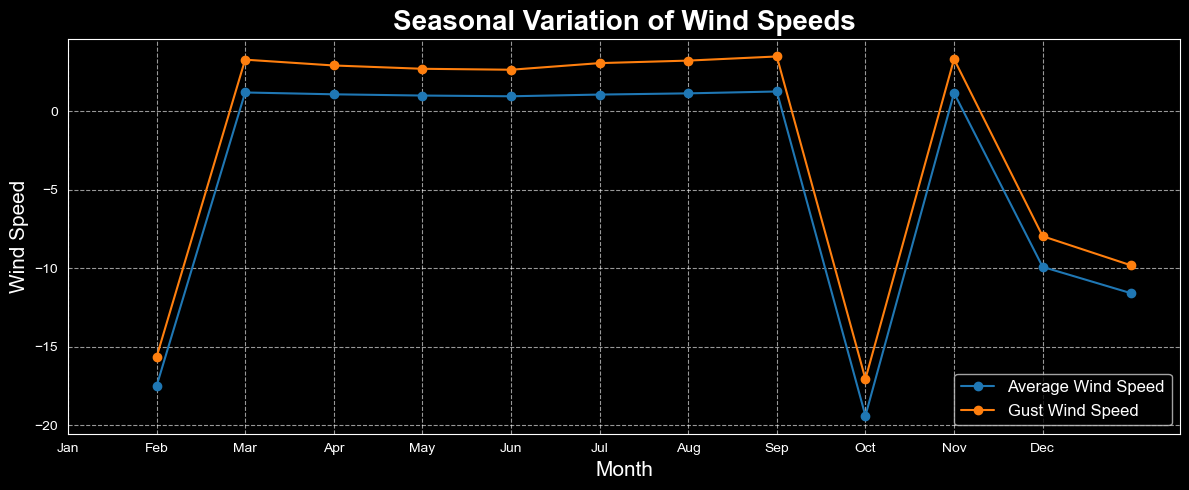

In [38]:

# Convert 'time_1' to datetime
cleaned_df['time_1'] = pd.to_datetime(cleaned_df['time_1'])

# Extract the month
cleaned_df['month'] = cleaned_df['time_1'].dt.month

# Calculate monthly means
monthly_avg = cleaned_df.groupby('month')[['avg_wind_speed', 'gust_wind_speed']].mean()

# Ensure all months are represented, even if some months might not have data
all_months = pd.DataFrame({'month': np.arange(1, 13)})
monthly_avg = all_months.merge(monthly_avg, on='month', how='left').set_index('month')

# Set the background style to dark
sns.set_style('darkgrid')
plt.style.use('dark_background')

# Plot monthly means
plt.figure(figsize=(12, 5))
ax = monthly_avg.plot(kind='line', marker='o', linestyle='-', ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
plt.title('Seasonal Variation of Wind Speeds', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Month', fontsize=15, color='white')
plt.ylabel('Wind Speed', fontsize=15, color='white')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], color='white')
plt.yticks(color='white')
plt.legend(['Average Wind Speed', 'Gust Wind Speed'], fontsize=12)

# Customize the plot appearance
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


The graph shows the seasonal variation of average wind speed and gust wind speed throughout the year. In February and September, both average and gust wind speeds peak, indicating stronger winds during these months. Conversely, December and October experience significant drops in wind speeds, with December starting low and October having a notable decline after the September peak.
This  behavior during these periods may be due to changes seen in the winter and autumn months.

#### Impact of Vapour Pressure on Humidity

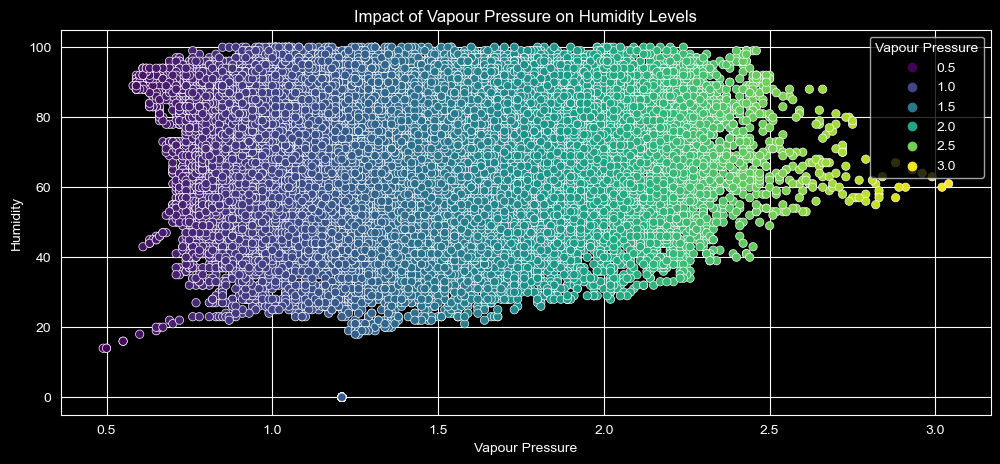

In [39]:

# Set up the plotting area
plt.figure(figsize=(12, 5))
plt.style.use('dark_background')

# Create scatter plot with a gradient based on density
sns.scatterplot(x='vapourpressure', y='humidity_1', data=cleaned_df, hue='vapourpressure', palette='viridis')

# Set plot title and labels
plt.title('Impact of Vapour Pressure on Humidity Levels', color='white')
plt.xlabel('Vapour Pressure', color='white')
plt.ylabel('Humidity', color='white')
plt.legend(title='Vapour Pressure', loc='upper right')

# Show the plot
plt.show()


The scatter plot shows how vapour pressure and humidity levels are related, using different colors to represent various vapour pressure values. Higher vapour pressure, shown in green and yellow, usually goes along with higher humidity levels. Most data points fall between 1.0 and 2.5 vapour pressure units, with humidity levels ranging from 0% to 100%.

When humidity levels are high (above 60%), vapour pressure values are spread out but tend to be higher. On the other hand, when humidity is low (below 40%), vapour pressure is generally lower, shown in purple and blue. This pattern suggests that higher humidity often means higher vapour pressure and more concentrated vapour pressure, though there is some variation.

####  Patterns in Air Temperature, Humidity, and Pressure

<Figure size 1200x600 with 0 Axes>

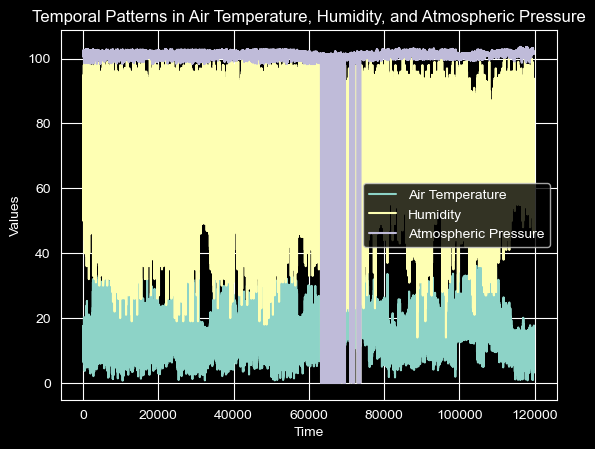

In [40]:
plt.figure(figsize=(12, 6))
cleaned_df[['air_temp', 'humidity_1', 'atm_pressure']].plot()
plt.title('Temporal Patterns in Air Temperature, Humidity, and Atmospheric Pressure')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Air Temperature', 'Humidity', 'Atmospheric Pressure'])
plt.show()

The graph shows a moist environment as a result of the consistent high humidity levels.
The air temperature, fluctuates a lot, suggesting regular cycles like daily or seasonal changes.
The atmospheric pressure remains stable, which might indicate that significant weather changes might not be frequent.

#### patterns of pollutants across the year

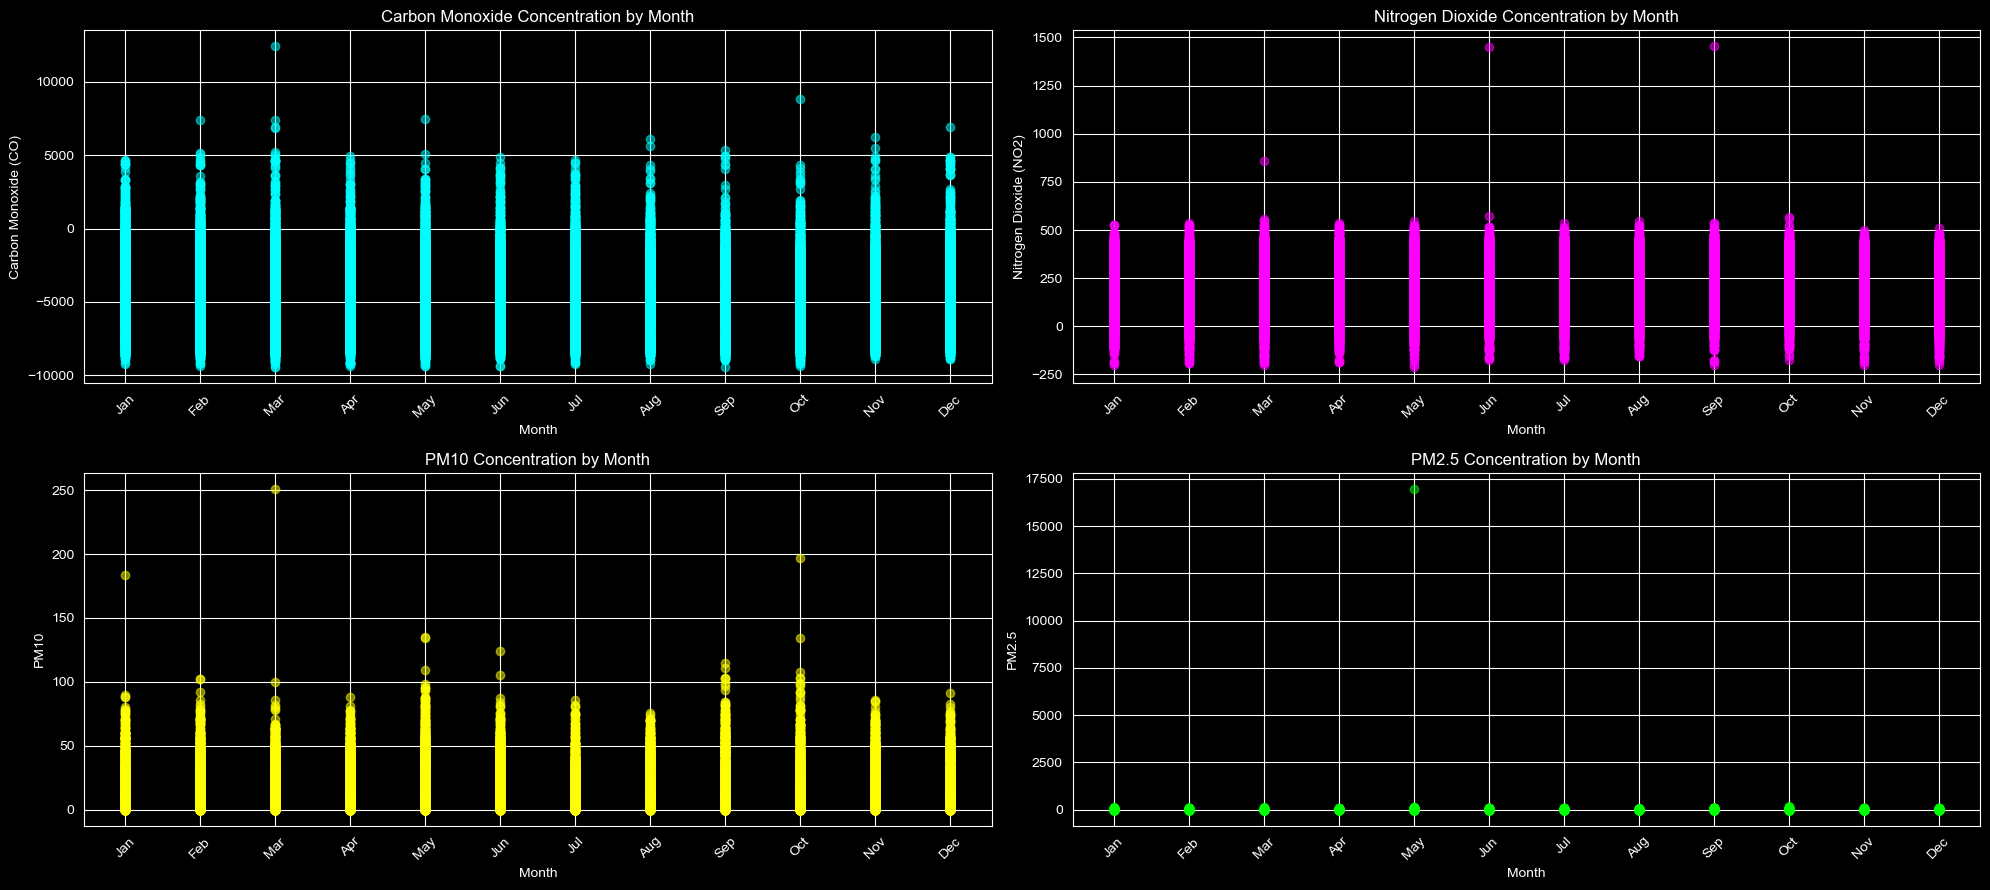

In [41]:

plt.figure(figsize=(20, 9))
plt.style.use('dark_background')

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot for Carbon Monoxide
plt.subplot(2, 2, 1)
plt.scatter(cleaned_df['month'], cleaned_df['carbonmonoxide'], color='cyan', alpha=0.5)
plt.title('Carbon Monoxide Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Carbon Monoxide (CO)', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for Nitrogen Dioxide
plt.subplot(2, 2, 2)
plt.scatter(cleaned_df['month'], cleaned_df['nitrogendioxide'], color='magenta', alpha=0.5)
plt.title('Nitrogen Dioxide Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('Nitrogen Dioxide (NO2)', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for PM10
plt.subplot(2, 2, 3)
plt.scatter(cleaned_df['month'], cleaned_df['pm10'], color='yellow', alpha=0.5)
plt.title('PM10 Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('PM10', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Plot for PM2.5
plt.subplot(2, 2, 4)
plt.scatter(cleaned_df['month'], cleaned_df['pm25'], color='lime', alpha=0.5)
plt.title('PM2.5 Concentration by Month', color='white')
plt.xlabel('Month', color='white')
plt.ylabel('PM2.5', color='white')
plt.xticks(range(1, 13), months, rotation=45, color='white')
plt.yticks(color='white')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


Carbon Monoxide (CO) and Nitrogen Dioxide (NO2):

These pollutants have levels that go up and down every month, but there are no clear trends showing they are increasing or decreasing over time. This suggests that the sources of these pollutants, like cars and factories, are consistent throughout the year.

PM10 and PM2.5:
In terms pf PM10(particulate matter) levels also fluctuate each month without a clear trend, which might be due to weather changes or different activities.
PM2.5(particulate matter) levels are stable and low throughout the year, indicating that efforts to control this pollutant might be effective.

#### Efect of pollutants across different years

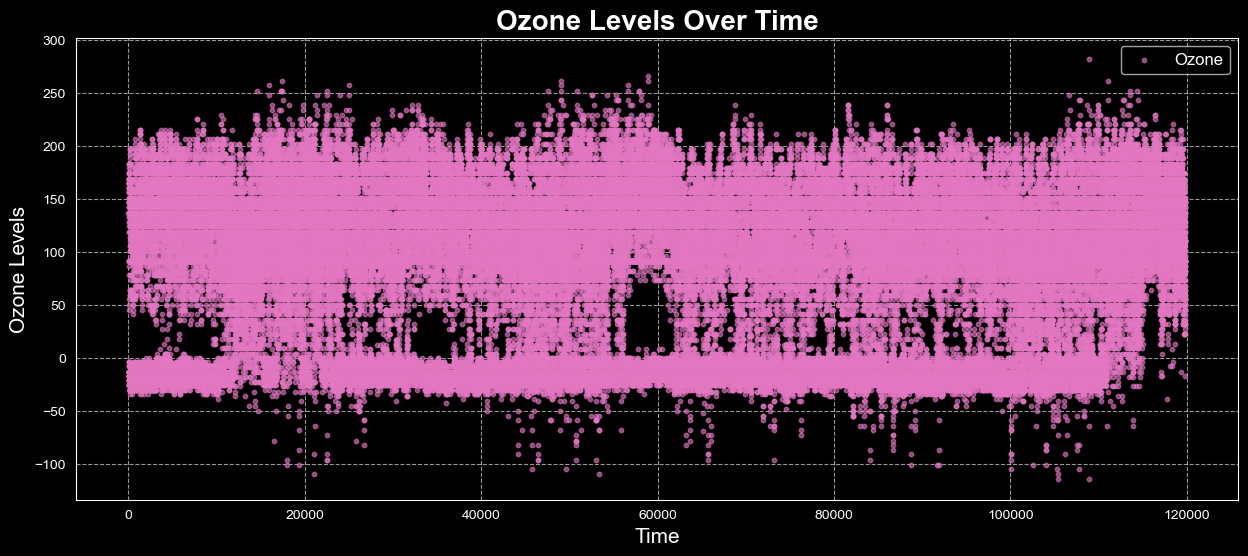

In [42]:
plt.figure(figsize=(15, 6))
plt.scatter(cleaned_df.index, cleaned_df['ozone'], label='Ozone', color='#e377c2', alpha=0.6, s=10)
plt.title('Ozone Levels Over Time', fontsize=20, fontweight='bold', color='white')
plt.xlabel('Time', fontsize=15, color='white')
plt.ylabel('Ozone Levels', fontsize=15, color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.style.use('dark_background')
plt.show()

The graph shows that ozone levels have been fairly consistent from 2021 to 2024, with most measurements densely clustered between 100 and 200 units. This indicates that the pollutant levels have remained stable over these years. The consistency in ozone levels suggests that the sources of pollution have not changed significantly.

If this trend continues, it could have a lasting impact on air quality and health in the future. Monitoring and addressing these  pollutant levels are important to prevent negative effects.

#### Feature engineering
-correlation
-outlier
-getting the truth label
-normalizing

In [43]:

outliers_dict = {}

# Iterate through columns and process only numeric columns
for column in cleaned_df.columns:
    if pd.api.types.is_numeric_dtype(cleaned_df[column]):
        # Calculate quantiles for the numeric column
        Q1 = cleaned_df[column].quantile(0.25)
        Q3 = cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Identify outliers in the numeric column
        outliers = ((cleaned_df[column] < (Q1 - 1.5 * IQR)) | (cleaned_df[column] > (Q3 + 1.5 * IQR))).sum()
        
        # Store the outliers count in the dictionary
        outliers_dict[column] = outliers

# Print the outliers count for each numeric column
print(outliers_dict)


{'rtc': 107, 'battery': 264, 'solarpanel': 0, 'command': 0, 'solar': 13629, 'precipitation': 2, 'strikes': 149, 'avg_wind_speed': 5407, 'avg_wind_direction': 23557, 'gust_wind_speed': 4825, 'vapourpressure': 1909, 'atm_pressure': 1942, 'air_temp': 3478, 'averagespl': 6698, 'carbonmonoxide': 211, 'humidity_1': 2244, 'ibatt': 7690, 'nitrogendioxide': 251, 'ozone': 0, 'particulateserr': 1, 'particulatesvsn': 3322, 'peakspl': 753, 'pm1': 15432, 'pm10': 12925, 'pm25': 14520, 'temperature': 3712, 'vbatt': 2933, 'vpanel': 0, 'month': 0}


In [44]:
from scipy.stats import mstats
# Define Winsorization limits
lower_limit = 0.005
upper_limit = 0.005

# Apply Winsorization to the DataFrame
cleaned_df_win = cleaned_df.copy()

for column in cleaned_df.columns:
    if column != 'time_1':  # Skip the datetime column
        cleaned_df_win[column] = mstats.winsorize(cleaned_df[column], limits=(lower_limit, upper_limit))

# Display the first few rows of the winsorized DataFrame
cleaned_df_win.head()


,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel,month
0,2021-05-14 18:11:23+00:00,"-37.8022141, 144.9656262",10090042.0,4.161,0.024,0.0,0.0,0.0,0.0,3.68,...,0.0,151.0,69.0,12.0,19.0,17.0,12.3,3.96,0.00,5
1,2022-05-03 10:25:31+00:00,"-37.8022141, 144.9656262",17564045.0,4.181,0.000,0.0,0.0,0.0,0.0,0.54,...,0.0,151.0,62.0,15.0,24.0,22.0,10.9,3.93,0.00,5
2,2022-05-03 21:42:23+00:00,"-37.8022141, 144.9656262",17604657.0,4.143,20.670,0.0,24.0,0.0,0.0,0.76,...,0.0,151.0,64.0,0.0,0.0,0.0,15.1,3.76,16.33,5
3,2022-05-04 00:42:43+00:00,"-37.8022141, 144.9656262",17615477.0,4.208,20.694,0.0,68.0,0.0,0.0,1.01,...,0.0,151.0,68.0,19.0,29.0,24.0,10.5,3.92,0.00,5
4,2021-05-15 07:55:22+00:00,"-37.8022141, 144.9656262",10139481.0,4.197,0.128,0.0,0.0,0.0,0.0,2.66,...,0.0,151.0,62.0,0.0,0.0,0.0,14.9,4.01,18.33,5


In [45]:
cleaned_df_win.describe()

C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\remmz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArra

,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,...,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel,month
count,1.198590e+05,119859.000000,119859.000000,119859.0,119859.000000,119859.0,119859.0,119859.000000,119859.000000,119859.000000,...,119859.0,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000
mean,3.647158e+07,4.180278,10.506219,0.0,120.815592,0.0,0.0,1.107361,167.390400,3.057195,...,0.0,146.814974,69.980302,3.097056,5.537523,4.414837,16.077913,3.861997,12.941850,6.342878
std,2.641132e+07,0.025018,10.075025,0.0,205.900515,0.0,0.0,0.576568,79.987735,1.819807,...,0.0,24.787475,7.652939,5.710540,9.523290,8.132549,5.095775,0.096541,11.051599,3.421330
min,1.347100e+04,4.124000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,57.000000,0.000000,0.000000,0.000000,5.400000,3.490000,0.000000,1.000000
25%,1.340553e+07,4.158000,0.032000,0.0,0.000000,0.0,0.0,0.710000,137.200000,1.730000,...,0.0,151.000000,63.000000,0.000000,1.000000,0.000000,12.600000,3.810000,0.000000,3.000000
50%,3.080300e+07,4.181000,11.604000,0.0,2.000000,0.0,0.0,0.980000,177.100000,2.640000,...,0.0,151.000000,69.000000,1.000000,2.000000,1.000000,15.400000,3.860000,16.410000,6.000000
75%,5.888349e+07,4.206000,21.411000,0.0,158.000000,0.0,0.0,1.350000,197.800000,3.890000,...,0.0,151.000000,75.000000,3.000000,6.000000,4.000000,18.800000,3.930000,21.790000,9.000000
max,8.848383e+07,4.227000,22.894000,0.0,906.000000,0.0,0.0,3.680000,357.900000,10.540000,...,0.0,151.000000,94.000000,31.000000,59.000000,47.000000,33.400000,4.020000,29.340000,12.000000


In [52]:
cleaned_df_win.tail(50)

,time_1,lat_long_1,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,...,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel,month
119809,2024-08-05 21:27:37+00:00,"-37.8022141, 144.9656262",88483832.0,4.131,11.604,0.0,5.0,0.0,0.0,0.76,...,0.0,151.0,63.0,0.0,0.0,0.0,28.2,4.02,20.94,8
119810,2024-08-05 21:42:47+00:00,"-37.8022141, 144.9656262",88483832.0,4.134,11.620,0.0,13.0,0.0,0.0,0.66,...,0.0,151.0,63.0,2.0,3.0,2.0,26.6,4.00,18.39,8
119811,2024-08-05 22:28:14+00:00,"-37.8022141, 144.9656262",88483832.0,4.206,22.652,0.0,130.0,0.0,0.0,0.54,...,0.0,0.0,72.0,0.0,0.0,0.0,24.5,3.96,18.30,8
119812,2024-08-05 23:29:08+00:00,"-37.8022141, 144.9656262",88483832.0,4.206,22.531,0.0,252.0,0.0,0.0,0.95,...,0.0,151.0,71.0,1.0,1.0,1.0,23.7,3.95,18.31,8
119813,2024-08-06 00:14:34+00:00,"-37.8022141, 144.9656262",88483832.0,4.209,22.684,0.0,54.0,0.0,0.0,1.57,...,0.0,151.0,67.0,2.0,4.0,3.0,23.1,3.96,18.27,8
119814,2024-08-06 07:46:54+00:00,"-37.8022141, 144.9656262",88483832.0,4.187,8.437,0.0,1.0,0.0,0.0,1.11,...,0.0,151.0,65.0,3.0,6.0,3.0,23.0,4.01,18.42,8
119815,2024-08-06 08:47:02+00:00,"-37.8022141, 144.9656262",88483832.0,4.184,0.201,0.0,0.0,0.0,0.0,0.95,...,0.0,151.0,69.0,1.0,2.0,1.0,15.4,3.86,16.41,8
119816,2024-08-06 10:46:19+00:00,"-37.8022141, 144.9656262",88483832.0,4.171,0.233,0.0,0.0,0.0,0.0,0.97,...,0.0,151.0,84.0,1.0,4.0,1.0,26.1,3.84,23.09,8
119817,2024-08-06 11:45:40+00:00,"-37.8022141, 144.9656262",88483832.0,4.168,0.209,0.0,0.0,0.0,0.0,0.50,...,0.0,151.0,64.0,3.0,3.0,3.0,24.8,3.95,18.34,8
119818,2024-08-06 15:16:17+00:00,"-37.8022141, 144.9656262",88483832.0,4.153,0.217,0.0,0.0,0.0,0.0,0.73,...,0.0,151.0,72.0,2.0,2.0,2.0,23.2,3.94,11.75,8


#### getting the correlation

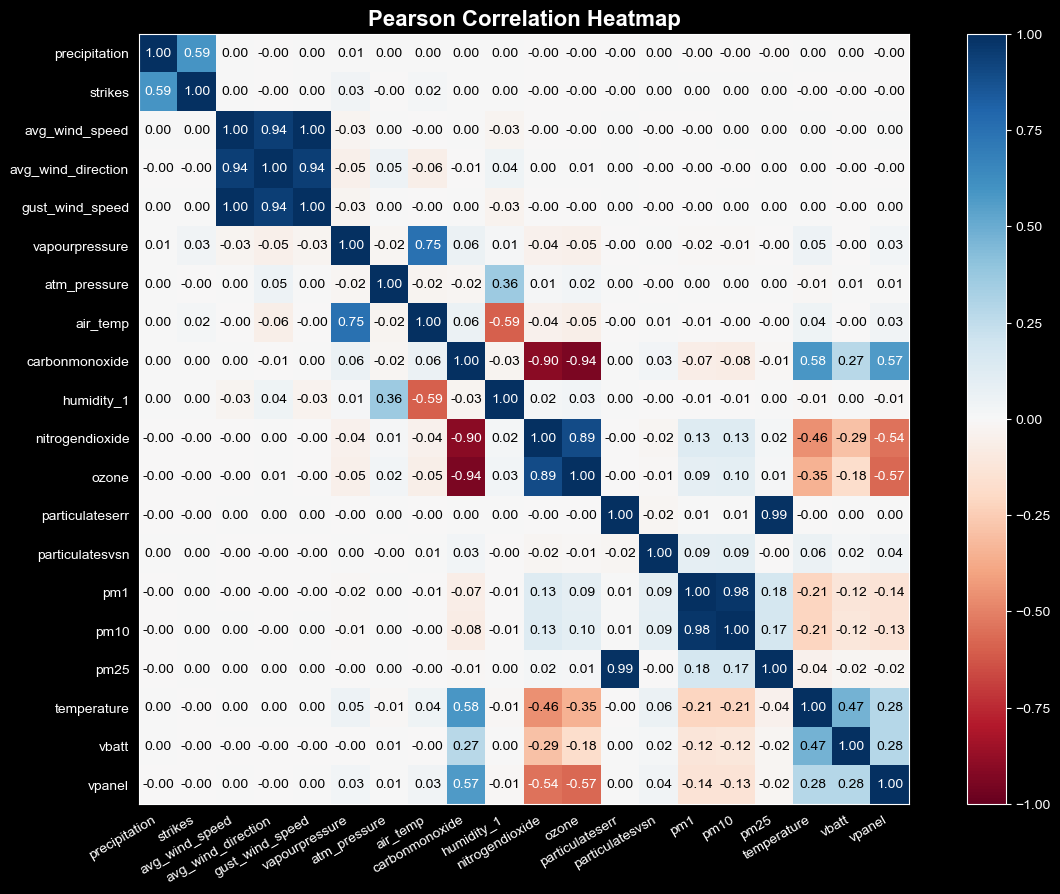

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def corrheatmap(R, labels):
    """
    Draws a correlation heat map, given:
    * R - matrix of correlation coefficients for all variable pairs,
    * labels - list of column names
    """
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)
    k = R.shape[0]

    # plot the heat map using a custom colour palette
    # (correlations are in [-1, 1])
    plt.imshow(R, cmap=plt.get_cmap("RdBu"), vmin=-1, vmax=1)

    # add text labels
    for i in range(k):
        for j in range(k):
            plt.text(j, i, f"{R[i, j]:.2f}", ha="center", va="center",
                     color="black" if np.abs(R[i, j]) < 0.5 else "white")

    plt.xticks(np.arange(k), labels=labels, rotation=30, ha='right')
    plt.tick_params(axis="x", which="both",
                    labelbottom=True, labeltop=False, bottom=False, top=False)

    plt.yticks(np.arange(k), labels=labels)
    plt.tick_params(axis="y", which="both",
                    labelleft=True, left=False, right=False)

    plt.grid(False)
    plt.colorbar()

# Specify columns to exclude
columns_to_exclude = ['time_1', 'lat_long_1', 'month', 'command', 'battery', 'peakspl',
                     'ibatt', 'averagespl','rtc','solar','solarpanel']  # replace with your column names

# Drop the specified columns
cleaned_df_reduced = cleaned_df.drop(columns=columns_to_exclude)

# Calculate the correlation matrix
correlation_matrix = cleaned_df_reduced.corr()

# Get the column labels
labels = correlation_matrix.columns

# Plot the correlation heatmap
plt.figure(figsize=(15, 10))
corrheatmap(correlation_matrix.values, labels)
plt.title('Pearson Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()


#### important columns needed

In [71]:
cleaned_df_win.columns

Index(['time_1', 'lat_long_1', 'rtc', 'battery', 'solarpanel', 'command',
       'solar', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'air_temp', 'averagespl', 'carbonmonoxide',
       'humidity_1', 'ibatt', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'peakspl', 'pm1', 'pm10', 'pm25', 'temperature',
       'vbatt', 'vpanel', 'month'],
      dtype='object')

In [78]:
final_df = cleaned_df_win[['time_1', 'lat_long_1', 'precipitation', 'strikes', 'avg_wind_speed',
       'avg_wind_direction', 'gust_wind_speed', 'vapourpressure',
       'atm_pressure', 'air_temp', 'carbonmonoxide',
       'humidity_1', 'nitrogendioxide', 'ozone', 'particulateserr',
       'particulatesvsn', 'pm1', 'pm10', 'pm25', 'temperature']]

In [79]:
final_df.head()

,time_1,lat_long_1,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,air_temp,carbonmonoxide,humidity_1,nitrogendioxide,ozone,particulateserr,particulatesvsn,pm1,pm10,pm25,temperature
0,2021-05-14 18:11:23+00:00,"-37.8022141, 144.9656262",0.0,0.0,3.68,253.5,10.54,0.93,100.70,7.8,-6448.0,88.0,287.0,137.0,0.0,151.0,12.0,19.0,17.0,12.3
1,2022-05-03 10:25:31+00:00,"-37.8022141, 144.9656262",0.0,0.0,0.54,158.5,1.14,1.25,100.91,16.2,-6916.0,68.0,325.0,156.0,0.0,151.0,15.0,24.0,22.0,10.9
2,2022-05-03 21:42:23+00:00,"-37.8022141, 144.9656262",0.0,0.0,0.76,7.7,2.43,1.21,100.83,14.0,-6261.0,75.0,268.0,137.0,0.0,151.0,0.0,0.0,0.0,15.1
3,2022-05-04 00:42:43+00:00,"-37.8022141, 144.9656262",0.0,0.0,1.01,9.9,3.22,1.17,100.91,13.4,-6916.0,76.0,325.0,156.0,0.0,151.0,19.0,29.0,24.0,10.5
4,2021-05-15 07:55:22+00:00,"-37.8022141, 144.9656262",0.0,0.0,2.66,253.8,8.07,0.78,101.63,11.7,-6261.0,56.0,258.0,119.0,0.0,151.0,0.0,0.0,0.0,14.9


In [80]:
final_df.describe()

,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,air_temp,carbonmonoxide,humidity_1,nitrogendioxide,ozone,particulateserr,particulatesvsn,pm1,pm10,pm25,temperature
count,119859.0,119859.0,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.00000,119859.000000,119859.000000,119859.000000,119859.0,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000
mean,0.0,0.0,1.107361,167.390400,3.057195,1.280571,101.179409,15.277643,-4617.20751,73.285444,202.944285,75.530924,0.0,146.814974,3.097056,5.537523,4.414837,16.077913
std,0.0,0.0,0.576568,79.987735,1.819807,0.333349,0.784642,5.193692,1990.60575,14.279726,103.353482,73.284656,0.0,24.787475,5.710540,9.523290,8.132549,5.095775
min,0.0,0.0,0.000000,0.000000,0.000000,0.730000,98.330000,4.400000,-8320.00000,19.000000,-68.000000,-32.000000,0.0,0.000000,0.000000,0.000000,0.000000,5.400000
25%,0.0,0.0,0.710000,137.200000,1.730000,1.030000,100.710000,11.600000,-6355.00000,65.000000,123.000000,-13.000000,0.0,151.000000,0.000000,1.000000,0.000000,12.600000
50%,0.0,0.0,0.980000,177.100000,2.640000,1.210000,101.200000,14.600000,-4764.00000,76.000000,200.000000,91.000000,0.0,151.000000,1.000000,2.000000,1.000000,15.400000
75%,0.0,0.0,1.350000,197.800000,3.890000,1.480000,101.710000,18.100000,-2802.00000,84.000000,277.000000,137.000000,0.0,151.000000,3.000000,6.000000,4.000000,18.800000
max,0.0,0.0,3.680000,357.900000,10.540000,2.310000,102.990000,33.100000,1036.00000,97.000000,441.000000,211.000000,0.0,151.000000,31.000000,59.000000,47.000000,33.400000


In [96]:
def classify_weather(row):
    # Define thresholds based on typical values for sunny weather
    if (row['vapourpressure'] >= 1 and  # Example threshold, adjust as needed
        #row['atm_pressure'] > 80 and  # Example threshold, adjust as needed
        #row['air_temp'] > 23 and  # Example threshold, adjust as needed
        row['humidity_1'] < 30 and  # Example threshold, adjust as needed
        row['ozone'] > 150 and  # Example threshold, adjust as needed
        row['temperature'] > 23):  # Example threshold, adjust as needed
        return 'sunny'
    
    # Define thresholds for rainy weather
    elif (row['vapourpressure'] > 2 and  # Higher during rain, adjust as needed
         # row['atm_pressure'] < 60 and  # Lower during rain, adjust as needed
          #row['air_temp'] <= 21 and  # Cooler or similar to sunny, adjust as needed
          row['humidity_1'] >= 70 and  # Higher during rain, adjust as needed
          row['ozone'] <= 40 and  # Lower during rain, adjust as needed
          row['temperature'] <= 21):  # Cooler or similar to sunny, adjust as needed
        return 'rainy'
    
    # Define thresholds for cloudy weather
    elif (0.7 < row['vapourpressure'] < 2 and  # Intermediate, adjust as needed
         # 50 < row['atm_pressure'] < 80 and  # Intermediate, adjust as needed
          #14 < row['air_temp'] < 22 and  # Intermediate, adjust as needed
          30 < row['humidity_1'] < 75 and  # Intermediate, adjust as needed
          50 < row['ozone'] < 150 and  # Intermediate, adjust as needed
          14 < row['temperature'] < 22):  # Intermediate, adjust as needed
        return 'cloudy'
    
    # Define thresholds for stormy weather
    elif (row['vapourpressure'] > 1.8 and  # Higher during storms, adjust as needed
         # row['atm_pressure'] < 30 and  # Very low during storms, adjust as needed
          #row['air_temp'] > 20 and  # Can vary, adjust as needed
          row['humidity_1'] > 85 and  # Very high during storms, adjust as needed
          row['ozone'] < 30 and  # Very low during storms, adjust as needed
          row['temperature'] > 20):  # Can vary, adjust as needed
        return 'stormy'
    
    # Default case if no specific condition is met
    return 'unknown'

# Create the target label column
final_df['weather_label'] = final_df.apply(classify_weather, axis=1)

# Print the updated DataFrame with the new 'weather_label' column
final_df.head()


C:\Users\remmz\AppData\Local\Temp\ipykernel_29036\1415522893.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['weather_label'] = final_df.apply(classify_weather, axis=1)


,time_1,lat_long_1,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,vapourpressure,atm_pressure,air_temp,...,humidity_1,nitrogendioxide,ozone,particulateserr,particulatesvsn,pm1,pm10,pm25,temperature,weather_label
0,2021-05-14 18:11:23+00:00,"-37.8022141, 144.9656262",0.0,0.0,3.68,253.5,10.54,0.93,100.70,7.8,...,88.0,287.0,137.0,0.0,151.0,12.0,19.0,17.0,12.3,unknown
1,2022-05-03 10:25:31+00:00,"-37.8022141, 144.9656262",0.0,0.0,0.54,158.5,1.14,1.25,100.91,16.2,...,68.0,325.0,156.0,0.0,151.0,15.0,24.0,22.0,10.9,unknown
2,2022-05-03 21:42:23+00:00,"-37.8022141, 144.9656262",0.0,0.0,0.76,7.7,2.43,1.21,100.83,14.0,...,75.0,268.0,137.0,0.0,151.0,0.0,0.0,0.0,15.1,unknown
3,2022-05-04 00:42:43+00:00,"-37.8022141, 144.9656262",0.0,0.0,1.01,9.9,3.22,1.17,100.91,13.4,...,76.0,325.0,156.0,0.0,151.0,19.0,29.0,24.0,10.5,unknown
4,2021-05-15 07:55:22+00:00,"-37.8022141, 144.9656262",0.0,0.0,2.66,253.8,8.07,0.78,101.63,11.7,...,56.0,258.0,119.0,0.0,151.0,0.0,0.0,0.0,14.9,cloudy


In [97]:
final_df['weather_label'].value_counts()

weather_label
unknown    100570
cloudy      18273
rainy         730
stormy        286
Name: count, dtype: int64

In [46]:

cleaned_df_input = cleaned_df.copy()

# Identify numeric columns
numeric_cols = cleaned_df.select_dtypes(include=[np.number]).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = cleaned_df[numeric_cols].quantile(0.25)
Q3 = cleaned_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Apply winsorization only to numeric columns
for col in numeric_cols:
    median = cleaned_df[col].median()
    mean = cleaned_df[col].mean()
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    
    # Replace values below lower_bound with the median
    cleaned_df_input[col] = np.where(cleaned_df[col] < lower_bound, median, cleaned_df[col])
    # Replace values above upper_bound with the median
    cleaned_df_input[col] = np.where(cleaned_df_input[col] > upper_bound, mean, cleaned_df_input[col])


In [48]:
cleaned_df_input.describe()

,rtc,battery,solarpanel,command,solar,precipitation,strikes,avg_wind_speed,avg_wind_direction,gust_wind_speed,...,particulateserr,particulatesvsn,peakspl,pm1,pm10,pm25,temperature,vbatt,vpanel,month
count,1.198590e+05,119859.000000,119859.000000,119859.0,119859.000000,1.198590e+05,119859.000000,119859.000000,119859.000000,119859.000000,...,1.198590e+05,119859.0,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000,119859.000000
mean,3.642696e+07,4.180365,10.507136,0.0,64.737713,4.176476e-10,0.000004,0.813869,174.878944,2.647081,...,1.232060e-08,151.0,69.827011,1.461923,3.075933,2.187992,15.626881,3.869423,12.942824,6.342878
std,2.636767e+07,0.025018,10.076169,0.0,94.163920,1.022418e-07,0.000106,1.069616,40.960773,1.674591,...,4.265474e-06,0.0,7.415284,1.729947,3.016703,2.403360,4.360355,0.083352,11.053058,3.421330
min,1.900000e+01,4.086000,0.000000,0.0,0.000000,0.000000e+00,0.000000,-3.728636,46.300000,-1.767909,...,0.000000e+00,151.0,55.000000,0.000000,0.000000,0.000000,3.300000,3.630000,0.000000,1.000000
25%,1.340553e+07,4.158000,0.032000,0.0,0.000000,0.000000e+00,0.000000,0.660000,162.557267,1.600000,...,0.000000e+00,151.0,63.000000,0.000000,1.000000,0.000000,12.600000,3.820000,0.000000,3.000000
50%,3.080300e+07,4.181000,11.604000,0.0,2.000000,0.000000e+00,0.000000,0.940000,177.100000,2.520000,...,0.000000e+00,151.0,69.000000,1.000000,2.000000,1.000000,15.400000,3.860000,16.410000,6.000000
75%,5.876984e+07,4.206000,21.411000,0.0,121.005173,0.000000e+00,0.000000,1.270000,189.800000,3.630000,...,0.000000e+00,151.0,75.000000,3.000000,5.596226,4.000000,18.200000,3.930000,21.790000,9.000000
max,8.899361e+07,4.231000,23.877000,0.0,395.000000,2.502941e-05,0.002995,2.310000,288.700000,7.130000,...,1.476735e-03,151.0,93.000000,7.000000,13.000000,10.000000,28.100000,4.040000,30.080000,12.000000


***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```